In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import math
import numpy as np
import colorsys
from scipy import optimize as sciopt
import os
import lmfit
import uncertainties as u
import dataset as ds
import fit_functions as funcs
import importlib

Welcome to JupyROOT 6.18/04


In [2]:
plt.style.use(hep.style.ATLAS)
plt.style.use({"axes.labelsize":'36', 'lines.linewidth':'2', 'lines.markersize':'2', 'xtick.labelsize':'16'})

### Set up the DataSet objects

In [130]:
importlib.reload(ds)
importlib.reload(funcs)

<module 'fit_functions' from '/home/lars/g-2/earlyPosition/fit_functions.py'>

In [136]:
energy_lim = [1000, 2400]

sixtyhour = ds.DataSet("1A", "60h", r.TFile("./60h.root"), energy_lim)
highkick  = ds.DataSet("1B", "HighKick", r.TFile("./highkick.root"), energy_lim)
nineday   = ds.DataSet("1C", "9day", r.TFile("./9day.root"), energy_lim)
endgame   = ds.DataSet("1D", "EndGame", r.TFile("./endgame.root"), energy_lim)
run2C     = ds.DataSet("2C", "run2C", r.TFile("./run2C.root"), energy_lim)

datasets = {"1A": sixtyhour, "1B":highkick, "1C":nineday, "1D":endgame, "2C": run2C}
#datasets = {"1D": endgame}


for name, dataset in datasets.items():
    dataset.set_up_calos(step_length=20, verbose=True)

Finished 1A calorimeter 1
Finished 1A calorimeter 2
Finished 1A calorimeter 3
Finished 1A calorimeter 4
Finished 1A calorimeter 5
Finished 1A calorimeter 6
Finished 1A calorimeter 7
Finished 1A calorimeter 8
Finished 1A calorimeter 9
Finished 1A calorimeter 10
Finished 1A calorimeter 11
Finished 1A calorimeter 12
Finished 1A calorimeter 13
Finished 1A calorimeter 14
Finished 1A calorimeter 15
Finished 1A calorimeter 16
Finished 1A calorimeter 17
Finished 1A calorimeter 18
Finished 1A calorimeter 19
Finished 1A calorimeter 20
Finished 1A calorimeter 21
Finished 1A calorimeter 22
Finished 1A calorimeter 23
Finished 1A calorimeter 24
Finished 1B calorimeter 1
Finished 1B calorimeter 2
Finished 1B calorimeter 3
Finished 1B calorimeter 4
Finished 1B calorimeter 5
Finished 1B calorimeter 6
Finished 1B calorimeter 7
Finished 1B calorimeter 8
Finished 1B calorimeter 9
Finished 1B calorimeter 10
Finished 1B calorimeter 11
Finished 1B calorimeter 12
Finished 1B calorimeter 13
Finished 1B calorim

In [5]:
rand_data = {}

In [158]:
"""
hints = {
    'c':    [-2.5, 2.5],
    'a':    [0, 20],
    'tauA': [4, 8],
    'b':    [0, 1],
    'tauB': [0, 100]
}
"""

hints = {
    #'c':    [-2.5, 2.5],
    'a':    [0, 9999],
    'tauA': [0, 9999],
    'b':    [0, 9999],
    'tauB': [0, 9999]
}

first_guess = {
    #'c':    0,
    'a':    3,
    'tauA': 5.79,
    'b':    3,
    'tauB': 8
}

#rand_data = {}

name = "2C"

this_data = pd.DataFrame(columns = ['a', 'tauA', 'b', 'tauB', 'a_err', 'tauA_err', 'b_err', 'tauB_err', 'redchi', 'caloNum'])

for num, calo in datasets[name].calos.items():
    first_guess = {'a':    3, 'tauA': 6, 'b':    3, 'tauB': 8}
    for attempt in range(1, 11):
        try:
            calo.build_params_2([10, 100], first_guess, hints)
            if(calo.func2_params['randomized'] == {}):
                first_guess = {'a':    3, 'tauA': 6, 'b':    3, 'tauB': 8}
            else:
                first_guess = calo.func2_params['randomized']
        except:
            print("The fit failed for {0} calo {1} on attempt {2}".format(name, num, attempt))
            first_guess = {'a':    3, 'tauA': 6, 'b':    3, 'tauB': 8}

    try:        
        p = calo.func2_params['randomized']
        p['caloNum'] = num
        this_data.loc[num] = p
    except:
        continue


    rand_data[name] = this_data

The fit failed for 2C calo 1 on attempt 1
The fit failed for 2C calo 1 on attempt 2
The fit failed for 2C calo 1 on attempt 3
The fit failed for 2C calo 1 on attempt 4
The fit failed for 2C calo 1 on attempt 5
The fit failed for 2C calo 1 on attempt 6
The fit failed for 2C calo 1 on attempt 7
The fit failed for 2C calo 1 on attempt 8
The fit failed for 2C calo 1 on attempt 9
The fit failed for 2C calo 1 on attempt 10
The fit failed for 2C calo 2 on attempt 1
The fit failed for 2C calo 2 on attempt 2
The fit failed for 2C calo 2 on attempt 3
The fit failed for 2C calo 2 on attempt 4
The fit failed for 2C calo 2 on attempt 5
The fit failed for 2C calo 2 on attempt 6
The fit failed for 2C calo 2 on attempt 7
The fit failed for 2C calo 2 on attempt 8
The fit failed for 2C calo 2 on attempt 9
The fit failed for 2C calo 2 on attempt 10
The fit failed for 2C calo 9 on attempt 1
The fit failed for 2C calo 9 on attempt 2
The fit failed for 2C calo 9 on attempt 3
The fit failed for 2C calo 9 on 

In [169]:

fig, ax = plt.subplots(3,2)
fig.set_size_inches(20, 30)
"""
for name, df in rand_data.items():
    ax[0][0].plot(df['caloNum'], df['c'])
    ax[0][1].plot(df['caloNum'], df['a'])
    ax[1][0].plot(df['caloNum'], df['tauA'])
    ax[1][1].plot(df['caloNum'], df['b'])
    ax[2][0].plot(df['caloNum'], df['redchi'], label=name)
    ax[2][1].plot(df['caloNum'], df['tauB'])
"""

rand_data_2 = {}
rand_data_2['1A'] = rand_data['1A']
rand_data_2['1B'] = rand_data['1B']
rand_data_2['1C'] = rand_data['1C']
rand_data_2['1D'] = rand_data['1D']
#rand_data_2['2C'] = rand_data['2C']

for name, df in rand_data_2.items():
    #ax[0][0].errorbar(df['caloNum'], df['c'], yerr=df['c_err'])
    ax[0][1].errorbar(df['caloNum'], df['a'], yerr=df['a_err'])
    ax[1][0].errorbar(df['caloNum'], df['tauA'], yerr=df['tauA_err'])
    ax[1][1].errorbar(df['caloNum'], df['b'], yerr=df['b_err'])
    ax[2][1].plot(df['caloNum'], df['redchi'], label=name)
    ax[2][0].errorbar(df['caloNum'], df['tauB'], yerr=df['tauB_err'])
    
#ax[0][0].set_ylim(-0.5, 3.5)
ax[0][1].set_ylim(0, 10)
ax[2][0].set_ylim(-100, 7500)
ax[1][0].set_ylim(4, 10)
ax[1][1].set_ylim(0, 4)
ax[2][1].set_ylim(0, 2)

#ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

ax[2][1].set_xlabel('calo number')
ax[2][0].set_xlabel('calo number')

#ax[2][1].set_yscale("log")

ax[0][0].set_ylabel('c    (mm)')
ax[0][1].set_ylabel('A    (mm)')
ax[2][1].set_ylabel(r'$chi^{2}$', fontsize=40)
ax[1][0].set_ylabel('τA    (μs)')
ax[2][0].set_ylabel('τB    (μs)')
ax[1][1].set_ylabel('B    (mm)')

fig.tight_layout()
fig.suptitle('With Randomization', fontsize=40, y=1.05)
ax[2][1].legend(loc=0, labelspacing=1.5, framealpha=1);
plt.savefig("func2_params_randomized", bbox_inches='tight')
plt.close()

### fft

[[Model]]
    Model(func2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 102
    # variables        = 4
    chi-square         = 299.552241
    reduced chi-square = 3.05665552
    Akaike info crit   = 117.886234
    Bayesian info crit = 128.386125
[[Variables]]
    a:     7.81505104 +/- 10929876.7 (139856754.00%) (init = 7.815051)
    tauA:  5.48173272 +/- 2509.29689 (45775.62%) (init = 5.481733)
    b:     0.99398672 +/- 10929873.7 (1099599569.77%) (init = 0.9939867)
    tauB:  5.48213330 +/- 19674.5966 (358885.78%) (init = 5.482133)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)       =  1.000
    C(tauA, tauB) =  0.975
    C(tauA, b)    =  0.123
    C(a, tauA)    =  0.123
    C(a, tauB)    = -0.101
    C(b, tauB)    = -0.101


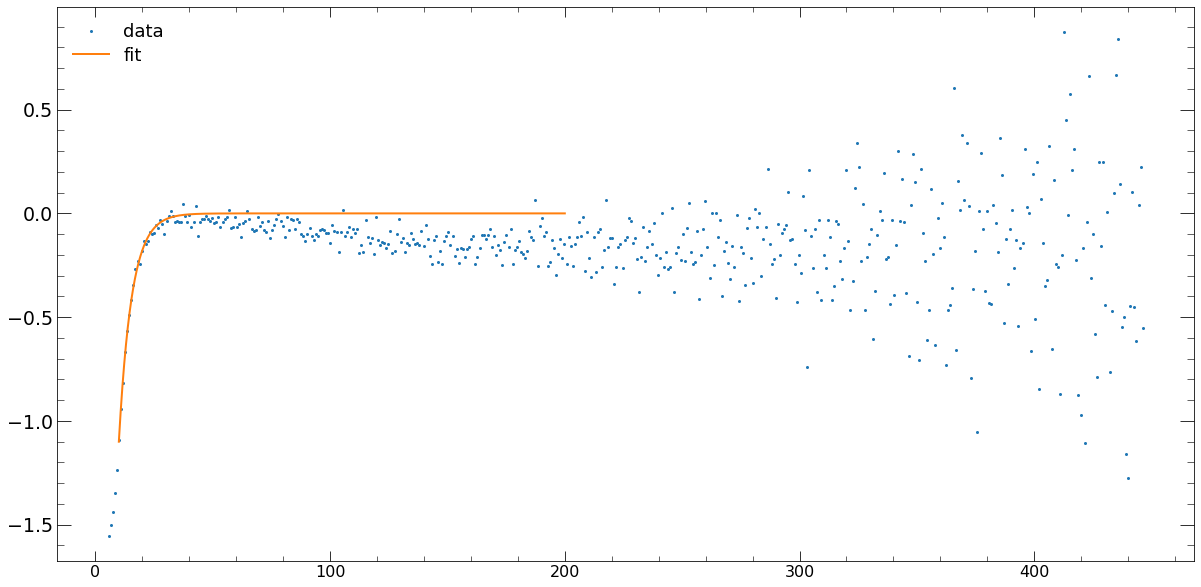

In [162]:
calo = datasets['1B'].calos[12]

df = calo.data['randomized']
params = calo.func2_params['randomized']

time = np.linspace(fit_lim[0],fit_lim[1],1000)
fit = funcs.func2(t=time, a=params['a'], tauA=params['tauA'], b=params['b'], tauB=params['tauB'])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(df['TimeBin'], df['Mean'], linestyle='none', marker='o', markersize=2, label='data')
ax.plot(time, fit, label='fit')

ax.legend(loc=0)
#ax.set_xlim(0, 300)

print(calo.func2_result['randomized'].fit_report())

[[Model]]
    Model(func2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 216
    # variables        = 4
    chi-square         = 1089.85247
    reduced chi-square = 5.14081355
    Akaike info crit   = 357.600150
    Bayesian info crit = 371.101263
##  Warning: uncertainties could not be estimated:
    a:     at initial value
    tauA:  at initial value
    b:     at boundary
    tauB:  at initial value
[[Variables]]
    a:     6.53000000 (init = 6.53)
    tauA:  5.79000000 (init = 5.79)
    b:     0.00000000 (init = 0)
    tauB:  2.00000000 (init = 2)


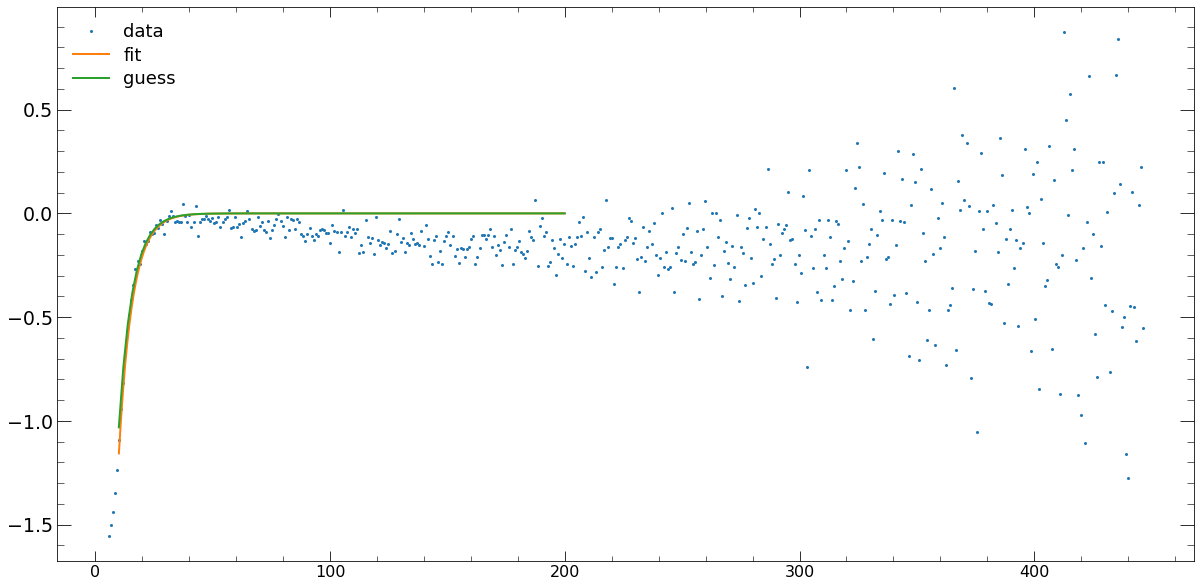

In [168]:
model = lmfit.Model(funcs.func2)
fit_lim = [10, 200]

df = datasets['1B'].calos[12].data['randomized']
fit_data = df[(df['TimeBin'] > fit_lim[0]) & (df['TimeBin'] < fit_lim[1]) ][:]


#model.set_param_hint('c', min=-2.5, max=2.5)
model.set_param_hint('a', min=0, max=1000)
model.set_param_hint('tauA', min=0, max=10000)
model.set_param_hint('b', min=0, max=1000)
model.set_param_hint('tauB', min=0, max=40000)


result = model.fit(fit_data['Mean'], t=fit_data['TimeBin'],
                   a=6.53, tauA=5.79, b=0, tauB=2,
                   weights=1/fit_data['MeanError'])
#cov = result.covar

time = np.linspace(fit_lim[0],fit_lim[1],100)
guess = funcs.func2(t=time, a=5.8, tauA=5.79, b=0, tauB=2)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(df['TimeBin'], df['Mean'], linestyle='none', marker='o', markersize=2, label='data')
ax.plot(fit_data['TimeBin'], result.best_fit, label='fit')
ax.plot(time, guess, label='guess')

ax.legend(loc=0)

print(result.fit_report())